<a href="https://colab.research.google.com/github/jwshin0908/Algorithm/blob/main/KOREANRE_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
pip install mplfinance

In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=23e9a80bf5caa36ee72e9e5b209764a8991707357ee703bc7f8e261d715b768a
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 0. 라이브러리 설정

In [61]:
import ta
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels
import warnings
import yfinance as yf
from mplfinance.original_flavor import candlestick2_ohlc

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.options.display.float_format="{:.5f}".format
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 1. 데이터 전처리

#### 1.1. 기본 데이터(코리안리 (003690) | KOSPI)

+ 추후 각종 주가지표 계산을 위해 2000년 1월 1일 ~ 25년 1월 22일까지의 데이터 다운로드
+ 데이터 전처리를 거쳐 모델링에 사용 예정

In [38]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코리안리/코리안리(000101_011231).csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코리안리/코리안리(020101_031231).csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코리안리/코리안리(040101_051231).csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코리안리/코리안리(060101_071231).csv', encoding='cp949')
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코리안리/코리안리(080101_091231).csv', encoding='cp949')
df6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코리안리/코리안리(100101_111231).csv', encoding='cp949')
df7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코리안리/코리안리(120101_131231).csv', encoding='cp949')
df8 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코리안리/코리안리(140101_151231).csv', encoding='cp949')
df9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코리안리/코리안리(160101_171231).csv', encoding='cp949')
df10 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코리안리/코리안리(180101_191231).csv', encoding='cp949')
df11 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코리안리/코리안리(200101_211231).csv', encoding='cp949')
df12 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코리안리/코리안리(220101_231231).csv', encoding='cp949')
df13 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/코리안리/코리안리(240101_251231).csv', encoding='cp949')

In [39]:
# 데이터프레임 리스트
dfs = [df13, df12, df11, df10, df9, df8, df7, df6, df5, df4, df3, df2, df1]

# 아래로 이어붙이기
df = pd.concat(dfs, axis=0, ignore_index=True)

In [40]:
df.shape

(6182, 11)

In [41]:
df.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2025/01/22,8000,-100,-1.23000,8100,8160,7970,255796,2056975130,1558568248000,194821031
1,2025/01/21,8100,-50,-0.61000,8210,8210,8080,176808,1438616260,1578050351100,194821031
2,2025/01/20,8150,-100,-1.21000,8300,8300,8100,124093,1011809700,1587791402650,194821031
3,2025/01/17,8250,140,1.73000,8110,8250,8100,131729,1082534130,1607273505750,194821031
4,2025/01/16,8110,-230,-2.76000,8400,8400,8100,194243,1585714880,1579998561410,194821031


In [42]:
df = df.sort_index(ascending=False).reset_index(drop=True)

In [43]:
df

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2000/01/04,13281,1700,14.68000,11673,13281,11673,94900,1314512500,135842007950,9400831
1,2000/01/05,12868,-413,-3.11000,12408,13511,12408,94390,1320994000,131611634000,9400831
2,2000/01/06,12454,-414,-3.21000,13603,13603,12408,70490,989356000,127381260050,9400831
3,2000/01/07,12776,322,2.58000,12868,13051,12454,147270,2036673500,130671550900,9400831
4,2000/01/10,14660,1884,14.75000,14660,14660,13511,63350,994092000,149943254450,9400831
...,...,...,...,...,...,...,...,...,...,...,...
6177,2025/01/16,8110,-230,-2.76000,8400,8400,8100,194243,1585714880,1579998561410,194821031
6178,2025/01/17,8250,140,1.73000,8110,8250,8100,131729,1082534130,1607273505750,194821031
6179,2025/01/20,8150,-100,-1.21000,8300,8300,8100,124093,1011809700,1587791402650,194821031
6180,2025/01/21,8100,-50,-0.61000,8210,8210,8080,176808,1438616260,1578050351100,194821031


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6182 entries, 0 to 6181
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      6182 non-null   object 
 1   종가      6182 non-null   int64  
 2   대비      6182 non-null   int64  
 3   등락률     6182 non-null   float64
 4   시가      6182 non-null   int64  
 5   고가      6182 non-null   int64  
 6   저가      6182 non-null   int64  
 7   거래량     6182 non-null   int64  
 8   거래대금    6182 non-null   int64  
 9   시가총액    6182 non-null   int64  
 10  상장주식수   6182 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 531.4+ KB


In [45]:
# 데이터 전처리 이전, 파생변수 생성을 위한 간단한 작업
df.rename(columns={'등락률':'수익률'}, inplace = True)
df['수익률'] = df['수익률']/100
df['일자'] = pd.to_datetime(df['일자'], format = '%Y/%m/%d')
df = df.sort_values(by = '일자',ascending = True)
df.reset_index(drop=True, inplace=True)

In [46]:
df

,일자,종가,대비,수익률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2000-01-04,13281,1700,0.14680,11673,13281,11673,94900,1314512500,135842007950,9400831
1,2000-01-05,12868,-413,-0.03110,12408,13511,12408,94390,1320994000,131611634000,9400831
2,2000-01-06,12454,-414,-0.03210,13603,13603,12408,70490,989356000,127381260050,9400831
3,2000-01-07,12776,322,0.02580,12868,13051,12454,147270,2036673500,130671550900,9400831
4,2000-01-10,14660,1884,0.14750,14660,14660,13511,63350,994092000,149943254450,9400831
...,...,...,...,...,...,...,...,...,...,...,...
6177,2025-01-16,8110,-230,-0.02760,8400,8400,8100,194243,1585714880,1579998561410,194821031
6178,2025-01-17,8250,140,0.01730,8110,8250,8100,131729,1082534130,1607273505750,194821031
6179,2025-01-20,8150,-100,-0.01210,8300,8300,8100,124093,1011809700,1587791402650,194821031
6180,2025-01-21,8100,-50,-0.00610,8210,8210,8080,176808,1438616260,1578050351100,194821031


#### 1.2. 파생변수 생성(주가 보조 지표)
+ 기술적 분석 지표들 생성
+ 추후 전처리 과정을 통해 data reducing 작업을 수행할 예정

In [47]:
H, L, C, V = df['고가'], df['저가'], df['종가'], df['거래량']

#### 1.3. Momentum Indicators 생성

In [48]:
# Relative Strength Index (RSI)
df['RSI'] = ta.momentum.rsi(close=C, fillna=True)
# Ultimate Oscillator (UO)
df['UO'] = ta.momentum.ultimate_oscillator(high=H, low=L, close=C, fillna=True)
# Stochastic Oscillator (SR)
df['SR'] = ta.momentum.stoch(close=C, high=H, low=L, fillna=True)
# Williams %R (WR)
df['WR'] = ta.momentum.williams_r(high=H, low=L, close=C, fillna=True)
# Rate of Change (ROC)
df['ROC'] = ta.momentum.roc(close=C, fillna=True)

#### 1.4. Volume Indicator 생성

In [49]:
# On-Balance Volume (OBV)
df['OBV'] = ta.volume.on_balance_volume(close=C, volume=V, fillna=True)

#### 1.5. Volatility Indicators 생성

In [50]:
# Bollinger High Bands (BHB)
df['BHB'] = ta.volatility.bollinger_hband(close=C, fillna=True)
# Bollinger Low Bands (BLB)
df['BLB'] = ta.volatility.bollinger_lband(close=C, fillna=True)

#### 1.6. Trend Indicators 생성

In [51]:
# Exponential Moving Average (EMA)
df['EMA'] = ta.trend.ema_indicator(close=C, fillna=True)
# Weighted Moving Average (WMA)
df['WMA'] = ta.trend.wma_indicator(close=C, fillna=True)
# Moving Average Convergence Divergence (MACD)
df['MACD'] = ta.trend.macd(close=C, fillna=True)
# Average Directional Movement Index (ADX)
df['ADX'] = ta.trend.adx(high=H, low=L, close=C, fillna=True)
# Commodity Channel Index (CCI)
df['CCI'] = ta.trend.cci(high=H, low=L, close=C, fillna=True)

#### 1.7. 생성 완료된 raw 데이터

In [52]:
df.head()

,일자,종가,대비,수익률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,RSI,UO,SR,WR,ROC,OBV,BHB,BLB,EMA,WMA,MACD,ADX,CCI
0,2000-01-04,13281,1700,0.14680,11673,13281,11673,94900,1314512500,135842007950,9400831,100.00000,0.00000,100.00000,-0.00000,0.00000,94900,13281.00000,13281.00000,13281.00000,0.00000,0.00000,0.00000,0.00000
1,2000-01-05,12868,-413,-0.03110,12408,13511,12408,94390,1320994000,131611634000,9400831,0.00000,16.96791,65.01632,-34.98368,0.00000,510,13487.50000,12661.50000,13217.46154,0.00000,-32.94587,0.00000,66.66667
2,2000-01-06,12454,-414,-0.03210,13603,13603,12408,70490,989356000,127381260050,9400831,0.00000,12.95443,40.46632,-59.53368,0.00000,-69980,13542.90950,12192.42383,13100.00592,0.00000,-91.40835,0.00000,-10.52632
3,2000-01-07,12776,322,0.02580,12868,13051,12454,147270,2036673500,130671550900,9400831,30.30486,18.38774,57.15026,-42.84974,0.00000,77290,13434.89130,12254.60870,13050.15885,0.00000,-110.48399,0.00000,-58.33333
4,2000-01-10,14660,1884,0.14750,14660,14660,13511,63350,994092000,149943254450,9400831,76.04575,42.46125,100.00000,-0.00000,0.00000,140640,14752.95314,11662.64686,13297.82672,0.00000,26.12039,0.00000,166.66667


### 2. 데이터 EDA

#### 2.1. 결측치 파악

In [54]:
df.isnull().sum()

,0
일자,0
종가,0
대비,0
수익률,0
시가,0
고가,0
저가,0
거래량,0
거래대금,0
시가총액,0


#### 2.2. 전반적인 데이터 수치 분포 파악

In [55]:
df.describe()

,일자,종가,대비,수익률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수,RSI,UO,SR,WR,ROC,OBV,BHB,BLB,EMA,WMA,MACD,ADX,CCI
count,6182,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000,6182.00000
mean,2012-07-10 02:37:27.816240640,11477.51197,6.12229,0.00071,11466.33048,11662.23115,11263.12132,344346.75299,3774471893.28567,1052209162704.08447,100995672.92640,50.23020,52.08898,50.30857,-49.69143,0.48598,128743012.08962,12442.23748,10529.18933,11482.11280,11462.36735,-5.91665,23.75128,3.05743
min,2000-01-04 00:00:00,3500.00000,-4200.00000,-0.15000,0.00000,0.00000,0.00000,0.00000,0.00000,52644653600.00000,9400831.00000,0.00000,0.00000,0.00000,-100.00000,-90.35877,-156890.00000,4000.05224,-17194.50805,3734.35030,0.00000,-8975.46463,0.00000,-666.66667
25%,2006-04-11 06:00:00,8000.00000,-100.00000,-0.01120,8000.00000,8120.00000,7862.50000,146224.50000,1602728437.50000,903069292790.00000,109940470.00000,42.60051,45.19896,24.93639,-75.06361,-3.62745,81929970.75000,8604.74824,7387.27487,8000.48918,7997.66667,-121.68309,16.87972,-81.29996
50%,2012-06-28 12:00:00,10690.00000,0.00000,0.00000,10695.00000,10850.00000,10500.00000,258169.00000,2779518350.00000,1182201265010.00000,118116781.00000,49.95564,52.26315,50.57180,-49.42820,0.00000,140194625.00000,11327.68382,10057.00036,10690.72844,10685.00000,3.49752,21.85297,4.04072
75%,2018-10-14 06:00:00,12285.00000,100.00000,0.01147,12250.00000,12450.00000,12050.00000,436769.50000,4737390437.50000,1360171010800.00000,120369116.00000,57.83906,59.26851,75.43141,-24.56859,4.27983,188999048.50000,13106.42918,11485.87110,12210.97680,12237.50000,134.54047,28.76833,86.69454
max,2025-01-22 00:00:00,45000.00000,3650.00000,0.16940,45000.00000,46600.00000,44150.00000,13338117.00000,177142991000.00000,1848742313550.00000,194821031.00000,100.00000,97.96607,100.00000,-0.00000,61.85567,227053265.00000,58574.51196,39749.44461,43115.82692,43637.77778,2665.01716,67.20764,560.62838
std,NaN,6074.40997,354.81364,0.02441,6057.57080,6200.12048,5907.57852,363058.05192,4219925797.68114,450013319176.48694,44141343.13039,11.61585,10.66849,29.07201,29.07201,9.06143,68305378.34733,7020.31956,5382.99076,5995.56858,6053.56979,617.13646,9.66948,111.07553


#### [대비, 수익률] EDA

<Axes: ylabel='수익률'>

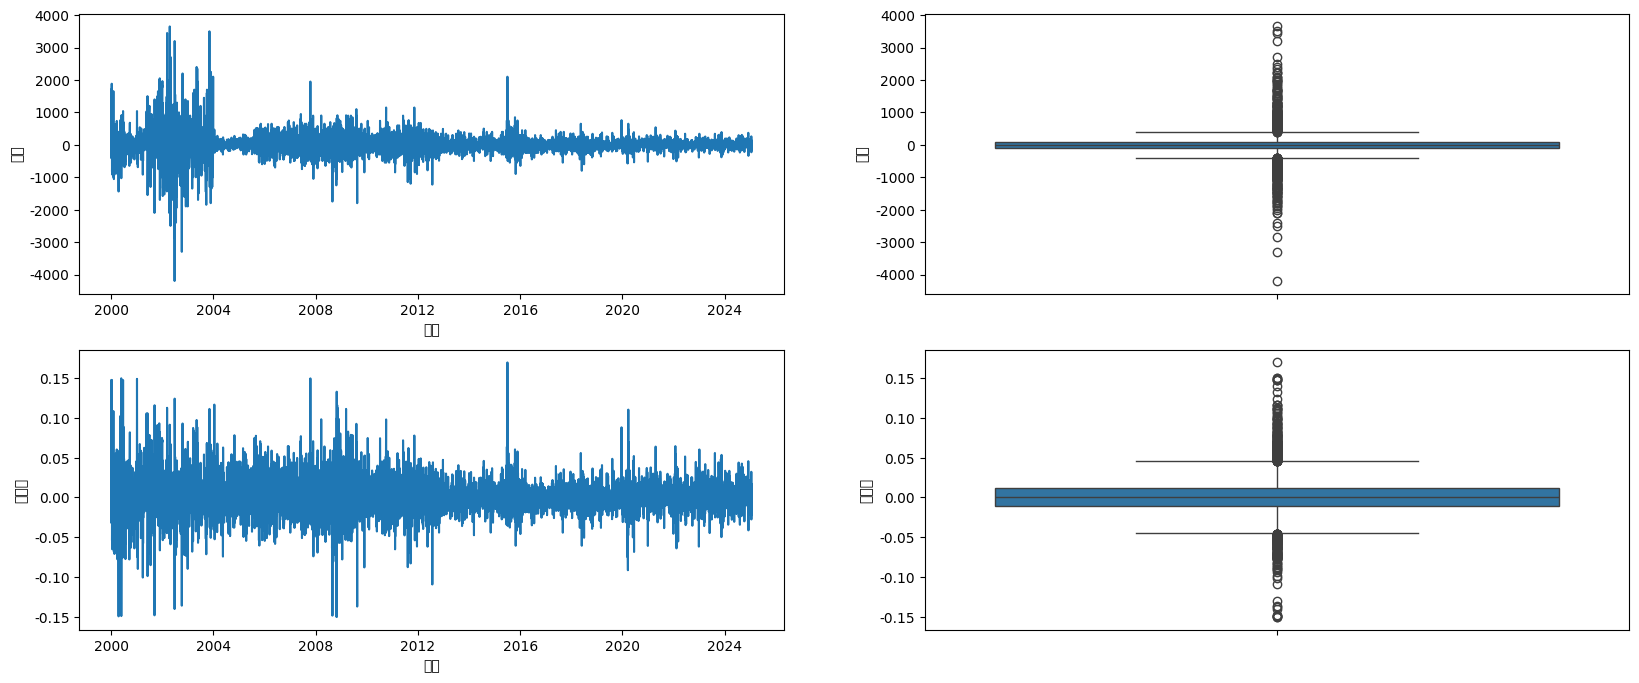

In [56]:
plt.figure(figsize=(20,8))

# 대비 lineplot
plt.subplot(2,2,1)
sns.lineplot(data=df, x='일자',y='대비')

# 대비 boxplot
plt.subplot(2,2,2)
sns.boxplot(df['대비'])

# 수익률 lineplot
plt.subplot(2,2,3)
sns.lineplot(data=df, x='일자',y='수익률')

# 수익률 boxplot
plt.subplot(2,2,4)
sns.boxplot(df['수익률'])

#### [시가, 고가, 저가, 종가, bollinger band] + 5,20,60,120일 이동평균 EDA

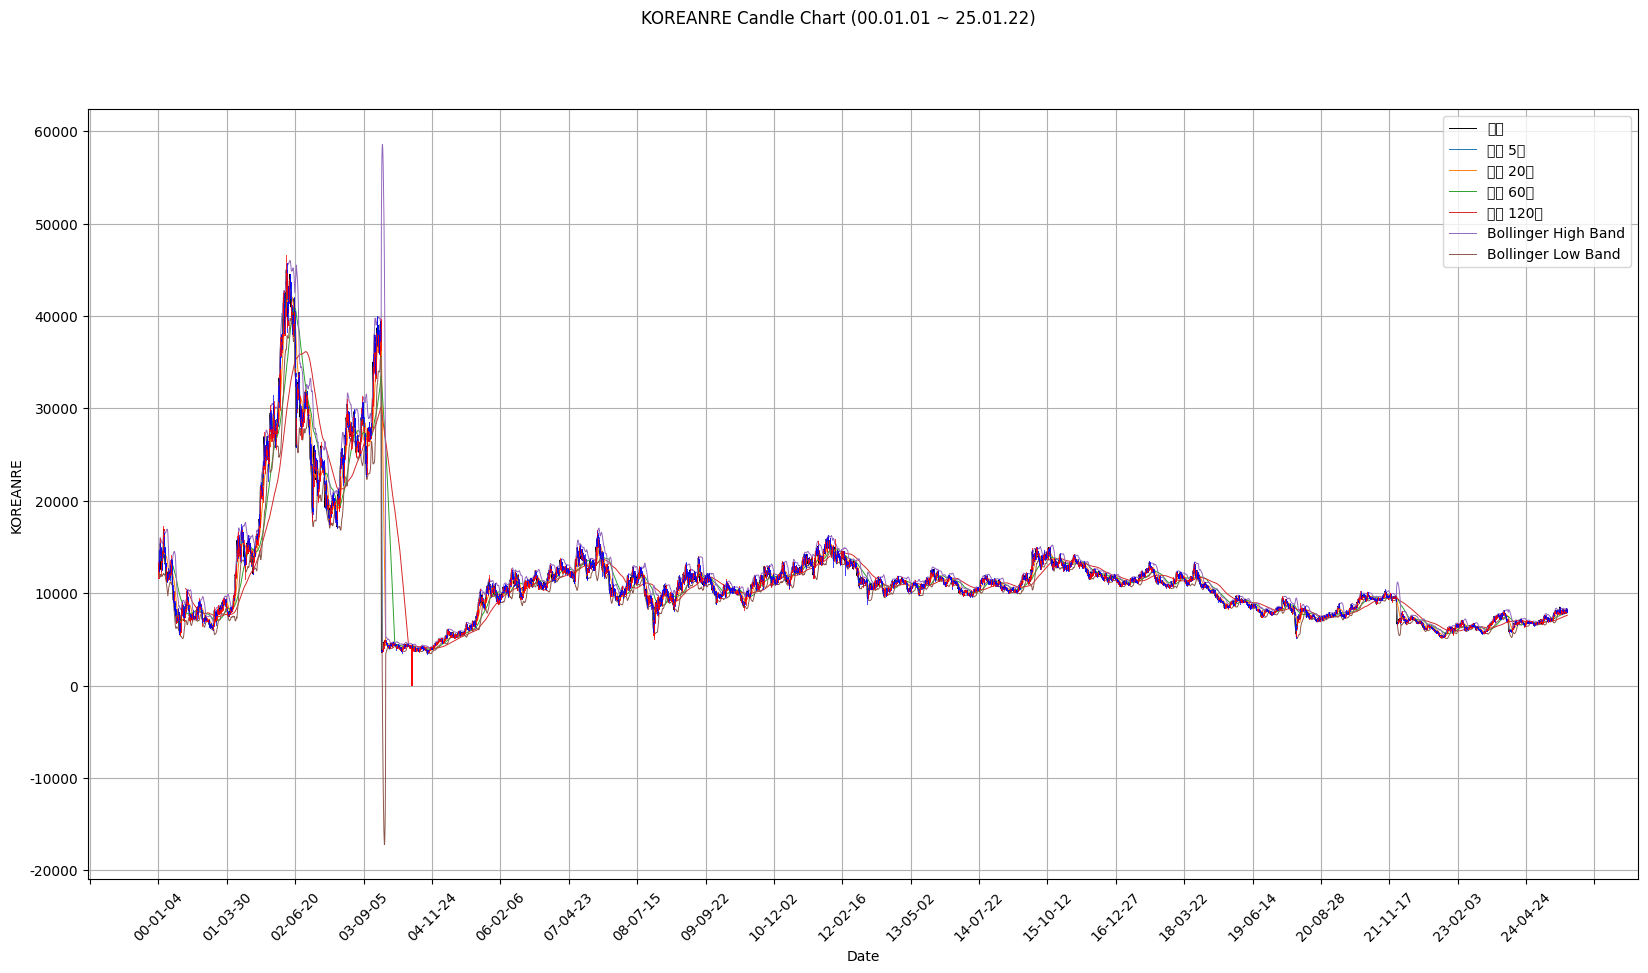

In [59]:
# 전체 데이터 시각화

fig, ax = plt.subplots(figsize=(20,10))

# x축 날짜
xdate = df['일자'].astype('str')
for i in range(len(xdate)):
    xdate[i] = xdate[i][2:] # 2020-01-01 => 20-01-01

# 종가 및 5,20,60,120일 이동평균
ax.plot(xdate, df['종가'], label="종가",linewidth=0.7,color='k')
ax.plot(xdate, df['종가'].rolling(window=5).mean(), label="평균 5일",linewidth=0.7)
ax.plot(xdate, df['종가'].rolling(window=20).mean(), label="평균 20일",linewidth=0.7)
ax.plot(xdate, df['종가'].rolling(window=60).mean(), label="평균 60일",linewidth=0.7)
ax.plot(xdate, df['종가'].rolling(window=120).mean(), label="평균 120일",linewidth=0.7)
ax.plot(xdate, df['BHB'], label="Bollinger High Band",linewidth=0.7)
ax.plot(xdate, df['BLB'], label="Bollinger Low Band",linewidth=0.7)
candlestick2_ohlc(ax,df['시가'],df['고가'],df['저가'],df['종가'], width=0.5, colorup='r', colordown='b')

fig.suptitle("KOREANRE Candle Chart (00.01.01 ~ 25.01.22)")
ax.set_xlabel("Date")
ax.set_ylabel("KOREANRE")
ax.xaxis.set_major_locator(ticker.MaxNLocator(25)) # x-축에 보일 ticker 개수 ~20개이면 1달
ax.legend(loc=1) # legend 위치
plt.xticks(rotation = 45) # x-축 글씨 45도 회전

plt.grid() # 그리드 표시
plt.show()

In [ ]:
kr = yf.download('META', start="2000-01-01", end="2025-01-22")
kr.head()